In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('consumo_energia.txt', delimiter=';')

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
df.shape

(2075259, 9)

In [6]:
# Removendo as duas primeiras colunas (desnecessárias para este modelo)
df.drop(columns=['Date', 'Time'], inplace=True)

In [7]:
# Verificando se há valores nulos no conjunto
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [9]:
# Há apenas uma coluna com valores nulos e proporcionalmente ao total de registros no dataset são poucos valores faltantes, então irei removê-los, apenas neste caso.
df = df.dropna()

In [10]:
df.isnull().values.any()

False

In [11]:
df.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

Verificando se há letras misturadas com números em algumas das colunas (ruídos)

Obs.: Como não tem tantas colunas, optei por fazer na mão ao invés de usar uma função lambda, por exemplo.

In [12]:
registros1 = df['Global_active_power'][df['Global_active_power'].str.contains(r'[a-zA-Z]⧵d', regex=True, na=False)]
registros1_1 = df['Global_active_power'][df['Global_active_power'].str.contains(r'⧵d[a-zA-Z]', regex=True, na=False)]

print(registros1)
print(registros1_1)

Series([], Name: Global_active_power, dtype: object)
Series([], Name: Global_active_power, dtype: object)


In [13]:
registros2 = df['Global_reactive_power'][df['Global_reactive_power'].str.contains(r'[a-zA-Z]⧵d', regex=True, na=False)]
registros2_1 = df['Global_reactive_power'][df['Global_reactive_power'].str.contains(r'⧵d[a-zA-Z]', regex=True, na=False)]

print(registros2)
print(registros2_1)

Series([], Name: Global_reactive_power, dtype: object)
Series([], Name: Global_reactive_power, dtype: object)


In [14]:
registros3 = df['Voltage'][df['Voltage'].str.contains(r'[a-zA-Z]⧵d', regex=True, na=False)]
registros3_1 = df['Voltage'][df['Voltage'].str.contains(r'⧵d[a-zA-Z]', regex=True, na=False)]

print(registros3)
print(registros3_1)

Series([], Name: Voltage, dtype: object)
Series([], Name: Voltage, dtype: object)


In [15]:
registros4 = df['Global_intensity'][df['Global_intensity'].str.contains(r'[a-zA-Z]⧵d', regex=True, na=False)]
registros4_1 = df['Global_intensity'][df['Global_intensity'].str.contains(r'⧵d[a-zA-Z]', regex=True, na=False)]

print(registros4)
print(registros4_1)

Series([], Name: Global_intensity, dtype: object)
Series([], Name: Global_intensity, dtype: object)


In [16]:
registros5 = df['Sub_metering_1'][df['Sub_metering_1'].str.contains(r'[a-zA-Z]⧵d', regex=True, na=False)]
registros5_1 = df['Sub_metering_1'][df['Sub_metering_1'].str.contains(r'⧵d[a-zA-Z]', regex=True, na=False)]

print(registros5)
print(registros5_1)

Series([], Name: Sub_metering_1, dtype: object)
Series([], Name: Sub_metering_1, dtype: object)


In [17]:
registros6 = df['Sub_metering_2'][df['Sub_metering_2'].str.contains(r'[a-zA-Z]⧵d', regex=True, na=False)]
registros6_1 = df['Sub_metering_2'][df['Sub_metering_2'].str.contains(r'⧵d[a-zA-Z]', regex=True, na=False)]

print(registros6)
print(registros6_1)

Series([], Name: Sub_metering_2, dtype: object)
Series([], Name: Sub_metering_2, dtype: object)


In [18]:
# Setting the columns type to float

df['Global_active_power'] = df['Global_active_power'].astype(dtype='float64')
df['Global_reactive_power'] = df['Global_reactive_power'].astype(dtype='float64')
df['Voltage'] = df['Voltage'].astype(dtype='float64')
df['Global_intensity'] = df['Global_intensity'].astype(dtype='float64')
df['Sub_metering_1'] = df['Sub_metering_1'].astype(dtype='float64')
df['Sub_metering_2'] = df['Sub_metering_2'].astype(dtype='float64')

In [19]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [20]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [21]:
# Checking if this process generated any missing value
df.isnull().values.any()

False

In [22]:
df_list = df.values

In [23]:
df_list

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]])

In [24]:
# Separando apenas 1% para treino para que a memória computacional não seja comprometida devido a quantidade grande de dados
a1, a2 = train_test_split(df_list, train_size=.01)

In [25]:
a1.shape

(20492, 7)

In [26]:
a2.shape

(2028788, 7)

In [27]:
normalization = MinMaxScaler()
a1_normalized = normalization.fit_transform(a1)

In [28]:
# Aplicando redução de dimensionalidade (resumindo a amostra a apenas 2 variáveis mais importantes)
pca = PCA(n_components = 2).fit_transform(a1_normalized)

In [29]:
k_means = [KMeans(n_clusters = k).fit(pca) for k in range(1,12)]

In [30]:
# Ajustando o ponto centroide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means]

In [31]:
# Calculando a distancia euclidiana de cada ponto para seu centroide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [32]:
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [33]:
#soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [34]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variancia explicada x Valor de K')

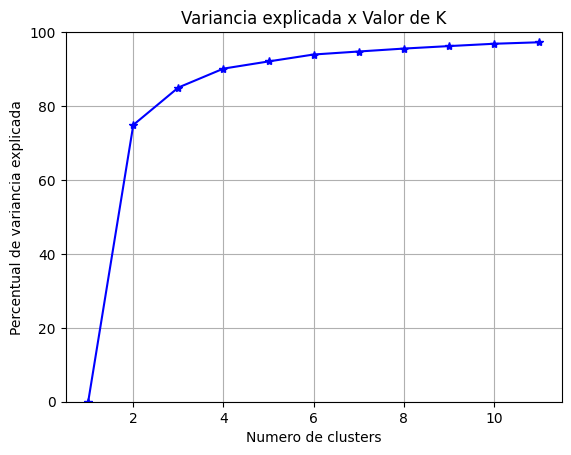

In [35]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1,12), soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel("Numero de clusters")
plt.ylabel('Percentual de variancia explicada')
plt.title("Variancia explicada x Valor de K")

In [36]:
# Criando um modelo com 9 clusters (A partir do cluster 9, a linha segue praticamente em reta, ou seja, sem muita variancia)
modelo_v1 = KMeans(n_clusters=8, random_state=42)
modelo_v1.fit(pca)

KMeans(random_state=42)

In [37]:
y = modelo_v1.fit_predict(pca)

print(y)

[5 6 5 ... 1 2 4]


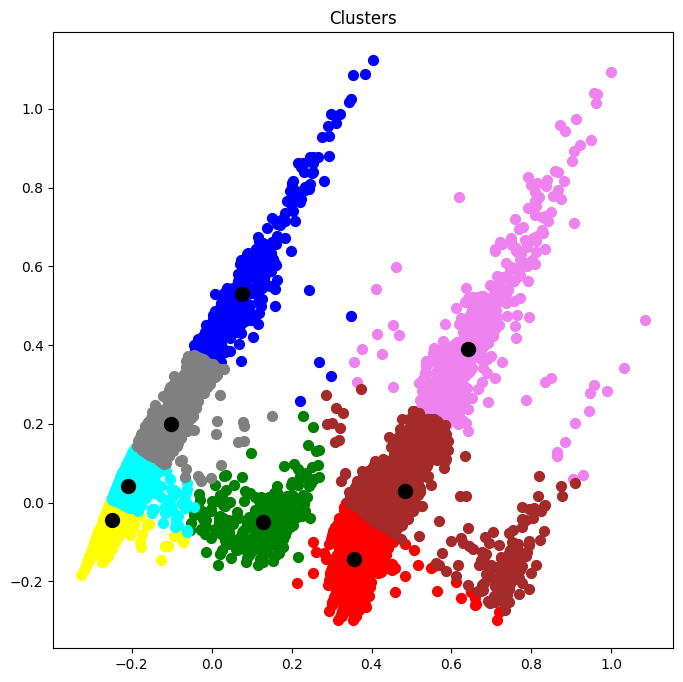

In [38]:
plt.figure(figsize=(8,8))
plt.scatter(pca[y==0,0], pca[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(pca[y==1,0], pca[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(pca[y==2,0], pca[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(pca[y==3,0], pca[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(pca[y==4,0], pca[y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(pca[y==5,0], pca[y==5,1], s=50, c='cyan', label='Cluster 6')
plt.scatter(pca[y==6,0], pca[y==6,1], s=50, c='brown', label='Cluster 7')
plt.scatter(pca[y==7,0], pca[y==7,1], s=50, c='gray', label='Cluster 8')

# plotting the centroids
plt.scatter(modelo_v1.cluster_centers_[:,0], modelo_v1.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Clusters')

plt.show()

In [39]:
# Testing the Silhouette Score method
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.5120340301720921

In [40]:
modelo_v2 = KMeans(n_clusters=3, random_state = 42)
modelo_v2.fit(pca)

KMeans(n_clusters=3, random_state=42)

In [41]:
y2 = modelo_v2.fit_predict(pca)

print(y)

[5 6 5 ... 1 2 4]


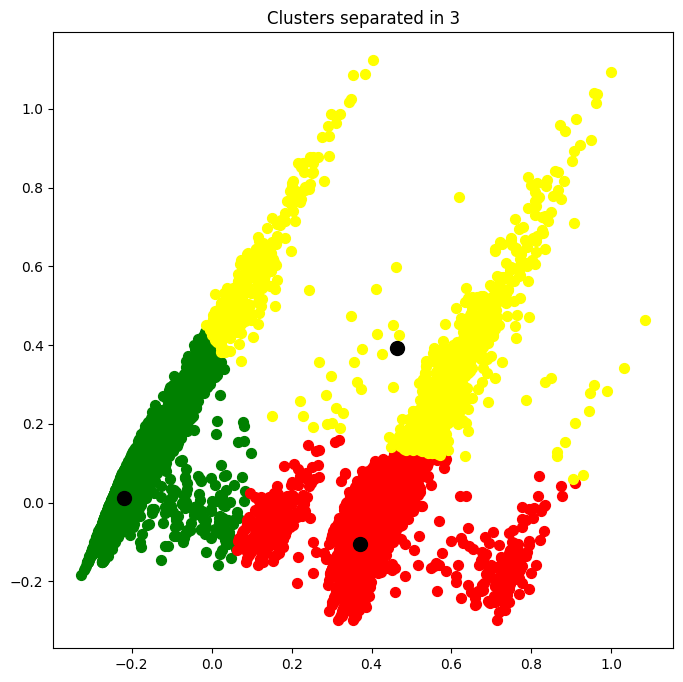

In [42]:
plt.figure(figsize=(8,8))
plt.scatter(pca[y2==0,0], pca[y2==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(pca[y2==1,0], pca[y2==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(pca[y2==2,0], pca[y2==2,1], s=50, c='yellow', label='Cluster 3')

# plotting the centroids
plt.scatter(modelo_v2.cluster_centers_[:,0], modelo_v2.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Clusters separated in 3')

plt.show()

In [43]:
labels2 = modelo_v2.labels_
silhouette_score(pca, labels2, metric = 'euclidean')

0.758094393229829

Com 3 clusters o modelo performa melhor de acordo com o silhouette score

Criando o Cluster Map com os clusters do modelo V2 que apresentou melhor performance no Silhouette Score

In [44]:
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [45]:
# Gerando o dataframe cluster_map (gerei com os dados desnormalizados (a1) para que seja mais fácil a visualização dos valores)
cluster_map = pd.DataFrame(a1, columns=names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
# Criando a coluna cluster para armazenar os seus devidos resultados
cluster_map['cluster'] = modelo_v2.labels_

In [46]:
cluster_map

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,0.192,0.060,235.35,0.8,0.0,0.0,0.0,0
1,3.184,0.056,237.79,13.6,1.0,0.0,18.0,1
2,0.526,0.058,241.56,2.2,0.0,2.0,1.0,0
3,1.470,0.106,239.94,6.0,1.0,1.0,18.0,1
4,0.712,0.398,242.52,3.2,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
20487,1.432,0.200,238.80,6.0,0.0,0.0,17.0,1
20488,1.480,0.060,243.72,6.0,0.0,0.0,19.0,1
20489,1.746,0.050,241.17,7.2,1.0,0.0,18.0,1
20490,0.212,0.050,243.50,0.8,0.0,0.0,0.0,0


In [47]:
# Visualizando a média de consumo por cluster
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    0.522299
1    1.725202
2    3.953192
Name: Global_active_power, dtype: float64

In [48]:
cluster_map.groupby('cluster')['Global_active_power'].count()

cluster
0    13087
1     6168
2     1237
Name: Global_active_power, dtype: int64

**De acordo com a última célula, a maioria dos clientes tem um nível de consumo em média de 0.52**

In [54]:
a1_normalized.shape

(20492, 7)

In [55]:
a1.shape

(20492, 7)